#ML4Net - Lab 3

## Team members

Arnau Ruiz Gonzale  205481 | Iago Ales Olmedo 268260

## Description

In this lab, you will train a time series forecaster using Federated Learning (FL).

The dataset you are going to use contains data from multiple APs. In particular, each AP's dataset contains the following features:

* `datetime` is the timestamp (date) at which the measurement was taken
* `Bytes` is the number of Bytes contributed at the corresponding datetime
* `Active Connections` is the number of active connections (users connected to the AP) at the corresponding datetime
* `Active Users` is the number of active users at the corresponding datetime
* `AP ID` is the ID of the AP where the measurement was taken

Original dataset: Chen, W., Lyu, F., Wu, F., Yang, P., & Ren, J. (2021). Flag: Flexible, accurate, and long-time user load prediction in large-scale WiFi system using deep RNN. IEEE Internet of Things Journal, 8(22), 16510-16521.

## Instructions

*   Follow the steps from this Notebook and complete the proposed exercises.
*   Deliver the completed Notebook by uploading it to your Github repository.
*   **Submission deadline: 8 June 2025 (EoB).**

## Setting up the environment

1. Connect your Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Download the dataset

In [2]:
#!wget https://github.com/fwilhelmi/fwilhelmi.github.io/blob/master/files/datasetLab3.pkl

3. Define the main path of the code

In [3]:
mypath="drive/MyDrive/AAX/Lab3"

4. Extract the source code to the destination folder

In [4]:
cd $mypath

/content/drive/.shortcut-targets-by-id/1oxzu8k_RpJMGjUHaxZVZztwXrcJ4FXa9/AAX/Lab3


## Loading the data




Load the data from the pickle file (https://docs.python.org/3/library/pickle.html) that contains the dataset.

**Important:** If you have issues with the dataset after automatically downloading and extracting it, download it and move it manually to the indicated folder.

In [5]:
import pickle
import os

print(os.getcwd())
print(os.path.exists('datasetLab3.pkl'))

# Open and load the pickle file
try:
    with open('datasetLab3.pkl', 'rb') as f:
        loaded_data = pickle.load(f)
    print("Data loaded successfully:")
    print(loaded_data)
except FileNotFoundError:
    print("Error: 'datasetLab3.pkl' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

/content/drive/.shortcut-targets-by-id/1oxzu8k_RpJMGjUHaxZVZztwXrcJ4FXa9/AAX/Lab3
True
Data loaded successfully:
                     Bytes  Active Connections  Active Users   AP ID
datetime                                                            
2019-04-30 07:10:00    0.0            0.075209           0.0  7-1012
2019-04-30 07:20:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:30:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:40:00    0.0            0.000000           0.0  7-1012
2019-04-30 07:50:00    0.0            0.000000           0.0  7-1012
...                    ...                 ...           ...     ...
2019-05-14 07:10:00    0.0            0.000000           0.0   7-104
2019-05-14 07:20:00    0.0            0.000000           0.0   7-104
2019-05-14 07:30:00    0.0            0.000000           0.0   7-104
2019-05-14 07:40:00    0.0            0.000000           0.0   7-104
2019-05-14 07:50:00    0.0            0.034091           0.

## EXERCISES

### Exercise 1:

Analyze the data from the different APs and discuss their properites (stationarity, trends, seasonality).

Select 2 or 3 key APs showing different properties and generate:

* Line plots (to plot the load vs the time)
* Autocorrelation plots (to show the relationship between past and future samples of the load)
* An Augmented Dickey-Fuller test (to study the stationarity of the AP)



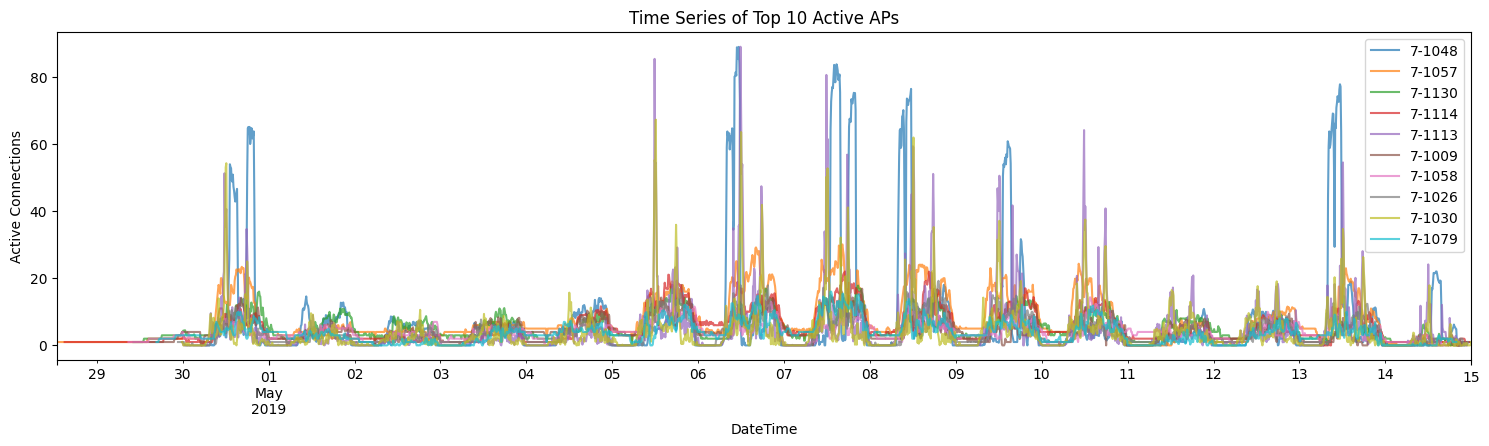

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the data from your pickle file
df = pd.read_pickle('datasetLab3.pkl')
# Group data by AP ID and calculate mean activity
ap_summary = df.groupby('AP ID')['Active Connections'].agg(['mean', 'max', 'std', 'count'])
ap_summary = ap_summary.sort_values('mean', ascending=False)

# Plot all APs' activity patterns
plt.figure(figsize=(15, 8))

# Plot 2: Activity distribution
plt.subplot(2, 1, 2)
for ap in ap_summary.index[:10]:  # Plot top 10 most active for clarity
    ap_data = df[df['AP ID'] == ap]['Active Connections']
    ap_data.plot(label=ap, alpha=0.7)
plt.title('Time Series of Top 10 Active APs')
plt.ylabel('Active Connections')
plt.xlabel('DateTime')
plt.legend()
plt.tight_layout()

plt.show()

Loaded data from 2019-04-28 11:40:00 to 2019-05-15 00:10:00

Analyzing AP 7-1048


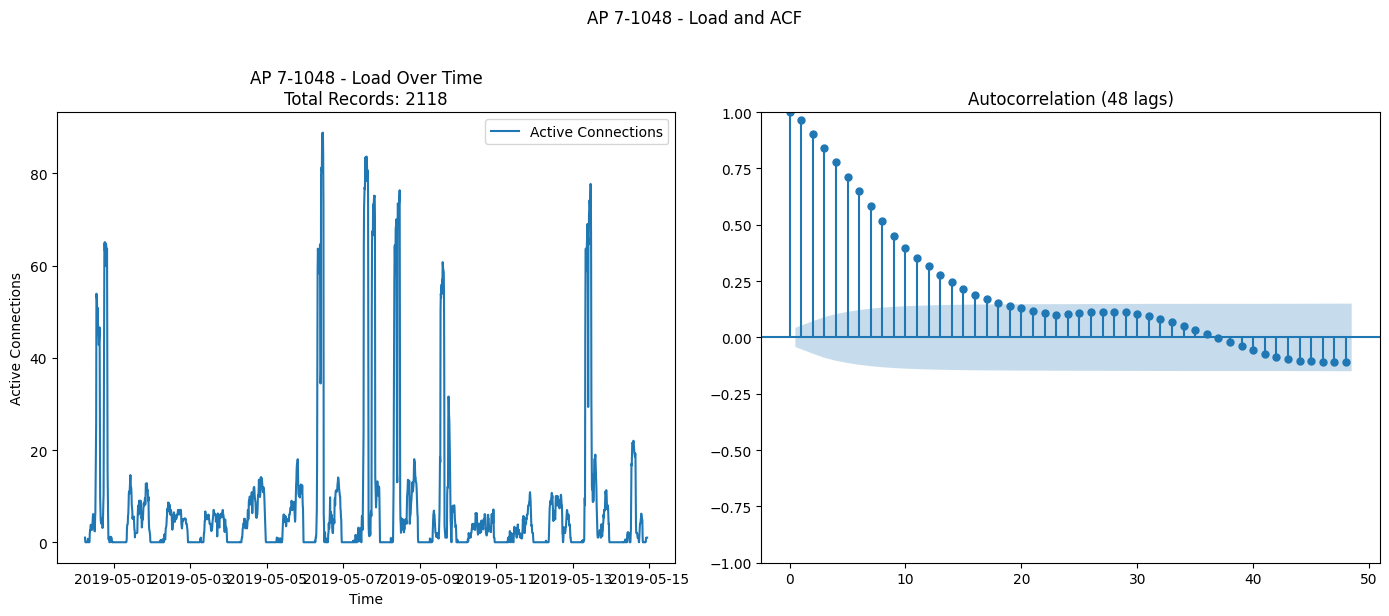

ADF Test Results:
  ADF Statistic: -6.2816
  p-value: 0.0000
  Critical Values:
    1%: -3.4335
    5%: -2.8629
    10%: -2.5675
  ✅ Series is likely **stationary** (rejects H0)

Analyzing AP 7-1079


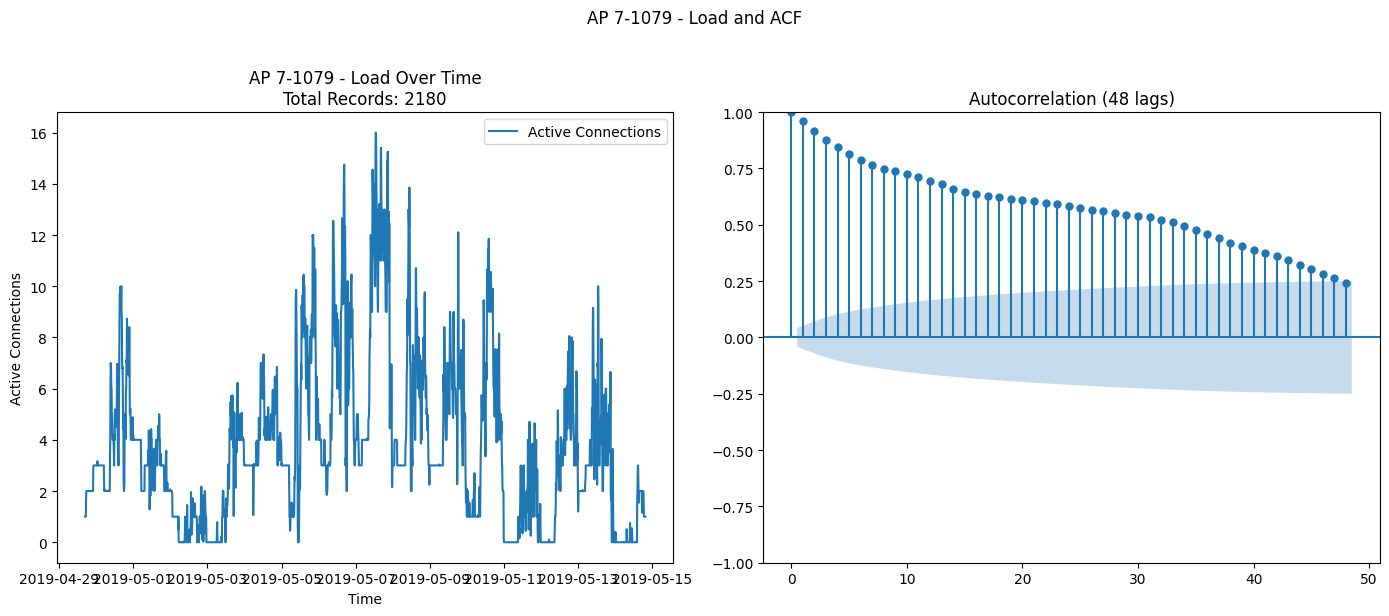

ADF Test Results:
  ADF Statistic: -4.2733
  p-value: 0.0005
  Critical Values:
    1%: -3.4334
    5%: -2.8629
    10%: -2.5675
  ✅ Series is likely **stationary** (rejects H0)

Analyzing AP 7-1057


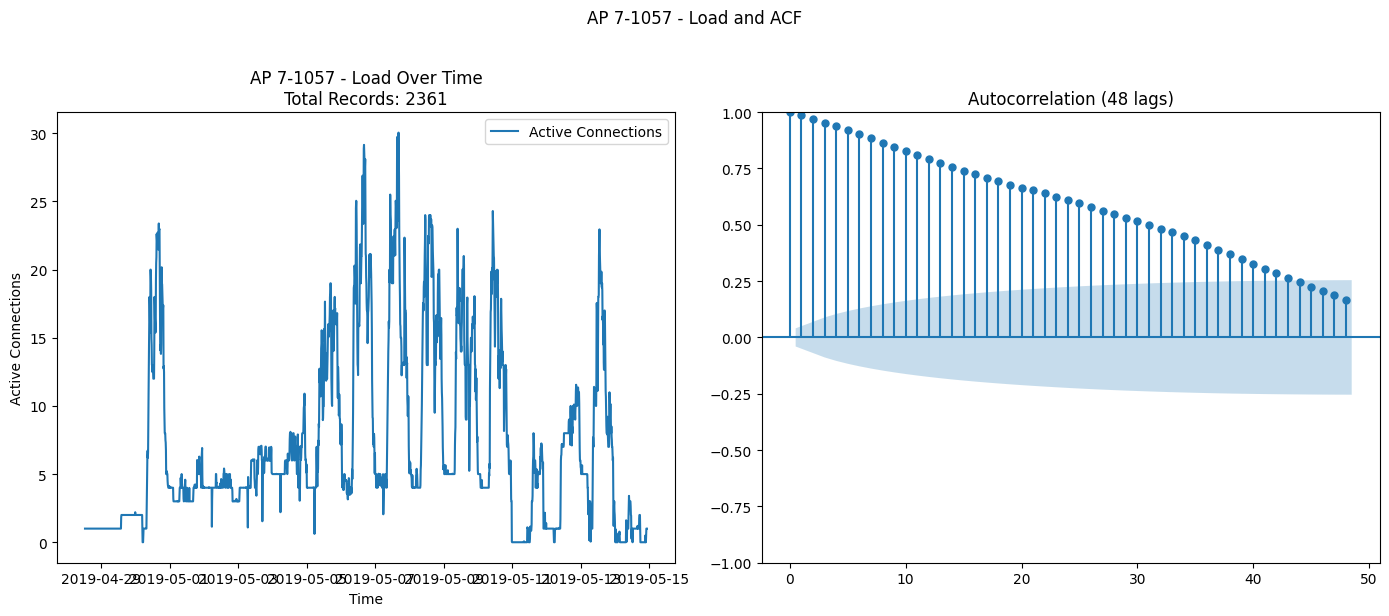

ADF Test Results:
  ADF Statistic: -4.6604
  p-value: 0.0001
  Critical Values:
    1%: -3.4331
    5%: -2.8628
    10%: -2.5674
  ✅ Series is likely **stationary** (rejects H0)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# 1. Load Data Function (assumes loaded_data is defined globally)
def load_data():
    df = loaded_data.copy()
    df.index = pd.to_datetime(df.index)
    df.sort_index(inplace=True)
    print(f"Loaded data from {df.index.min()} to {df.index.max()}")
    return df

# 2. Analyze a single AP (no train/test split)
def analyze_ap(df, ap_id):
    ap_data = df[df['AP ID'] == ap_id].sort_index()
    return {
        'ap_id': ap_id,
        'data': ap_data
    }

# 3. Plot load vs time and autocorrelation
def plot_ap_results(results):
    ap_id = results['ap_id']
    data = results['data']

    plt.figure(figsize=(14, 6))

    # Load vs Time Plot
    plt.subplot(1, 2, 1)
    plt.plot(data.index, data['Active Connections'], label='Active Connections')
    plt.title(f'AP {ap_id} - Load Over Time\nTotal Records: {len(data)}')
    plt.xlabel('Time')
    plt.ylabel('Active Connections')
    plt.legend()

    # Autocorrelation Plot
    plt.subplot(1, 2, 2)
    if data['Active Connections'].std() > 0:
        plot_acf(data['Active Connections'].dropna(), lags=48, ax=plt.gca())
        plt.title('Autocorrelation (48 lags)')
    else:
        plt.text(0.5, 0.5, 'No variability in data', ha='center', va='center')
        plt.title('Autocorrelation')

    plt.suptitle(f"AP {ap_id} - Load and ACF", y=1.02)
    plt.tight_layout()
    plt.show()

# 4. Run ADF test
def perform_adf_test(series):
    series = series.dropna()
    if len(series) < 10:
        print("Not enough data for ADF test.")
        return
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"  ADF Statistic: {result[0]:.4f}")
    print(f"  p-value: {result[1]:.4f}")
    print("  Critical Values:")
    for key, value in result[4].items():
        print(f"    {key}: {value:.4f}")
    if result[1] < 0.05:
        print("  ✅ Series is likely **stationary** (rejects H0)")
    else:
        print("  ❌ Series is likely **non-stationary** (fails to reject H0)")

# 5. Main execution
if __name__ == "__main__":
    # Load data
    df = load_data()

    # APs to analyze
    target_aps = ["7-1048", "7-1079", "7-1057"]

    # Analyze and plot each AP
    for ap_id in target_aps:
        print(f"\n{'='*40}")
        print(f"Analyzing AP {ap_id}")
        print(f"{'='*40}")

        results = analyze_ap(df, ap_id)
        plot_ap_results(results)
        perform_adf_test(results['data']['Active Connections'])


### Exercise 2:

Prepare the data to be presented as a time series to the ML model. For that, you will have to split features from samples by differentiating between an observation window (e.g., 10 samples) and a prediction window (e.g., 2 samples). Use a sliding window to iterate over all the samples.

Example: For an array [0,1,2,3,4,5], using an observation window $T_o$ = 3 and a prediction window $T_p$ = 1 would lead to the following time series data:
* $x_1$ = [0,1,2], $y_1$ = [3]
* $x_2$ = [1,2,3], $x_2$ = [4]
* $x_3$ = [2,3,4], $y_3$ = [5]

(where x are the features and y the labels)

In [8]:
# (response to exercise 2)
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

def create_time_series_sequences(data: pd.DataFrame, feature_cols, target_col, To=10, Tp=2):
    """
    Generate sequences using sliding windows.
    """
    X, y = [], []
    for i in range(len(data) - To - Tp + 1):
        X_seq = data.iloc[i : i + To][feature_cols].values
        y_seq = data.iloc[i + To : i + To + Tp][target_col].values
        X.append(X_seq)
        y.append(y_seq)
    return np.array(X), np.array(y)

def prepare_ap_data_for_model(df, ap_id, feature_cols, target_col, To=10, Tp=2, test_size=0.2):
    """
    Filter data by AP ID and prepare for ML using sliding windows.
    """
    ap_df = df[df['AP ID'] == ap_id].copy().sort_index()

    # Drop rows with missing data
    ap_df = ap_df.dropna(subset=feature_cols + [target_col])

    # Train/test split
    split_idx = int(len(ap_df) * (1 - test_size))
    train_df = ap_df.iloc[:split_idx]
    test_df = ap_df.iloc[split_idx:]

    # Normalize features
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_df[feature_cols])
    test_scaled = scaler.transform(test_df[feature_cols])

    # Replace original values with scaled ones
    train_df[feature_cols] = train_scaled
    test_df[feature_cols] = test_scaled

    # Generate sequences
    X_train, y_train = create_time_series_sequences(train_df, feature_cols, target_col, To, Tp)
    X_test, y_test = create_time_series_sequences(test_df, feature_cols, target_col, To, Tp)

    return X_train, y_train, X_test, y_test, scaler


### Exercise 3:

Split the time series data into train, test, and validation, based on your criteria.

In [9]:
# (response to exercise 3)
def prepare_ap_data_for_model(df, ap_id, feature_cols, target_col, To=10, Tp=2):
    """
    Prepare AP data for time series ML modeling using 70/15/15 time-based split.
    """
    ap_df = df[df['AP ID'] == ap_id].copy().sort_index()
    ap_df = ap_df.dropna(subset=feature_cols + [target_col])

    # Determine split indices
    total_len = len(ap_df)
    train_end = int(total_len * 0.7)
    val_end = int(total_len * 0.85)

    train_df = ap_df.iloc[:train_end]
    val_df = ap_df.iloc[train_end:val_end]
    test_df = ap_df.iloc[val_end:]

    # Scale features based on training data
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train_df[feature_cols])
    val_scaled = scaler.transform(val_df[feature_cols])
    test_scaled = scaler.transform(test_df[feature_cols])

    train_df[feature_cols] = train_scaled
    val_df[feature_cols] = val_scaled
    test_df[feature_cols] = test_scaled

    # Generate sequences
    X_train, y_train = create_time_series_sequences(train_df, feature_cols, target_col, To, Tp)
    X_val, y_val = create_time_series_sequences(val_df, feature_cols, target_col, To, Tp)
    X_test, y_test = create_time_series_sequences(test_df, feature_cols, target_col, To, Tp)

    return {
        'X_train': X_train, 'y_train': y_train,
        'X_val': X_val, 'y_val': y_val,
        'X_test': X_test, 'y_test': y_test,
        'scaler': scaler
    }


### Exercise 4:
Define a model (e.g., GRU, LSTM, CNN, Transformer) able to receive the time series the data you generated in the previous exercise.

In [10]:
# (response to exercise 4)
#Defining an LSTM
import torch
import torch.nn as nn

class TimeSeriesLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1, output_dim=1, dropout=0.0):
        super(TimeSeriesLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        # LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)

        # Fully connected layer to map hidden state to output
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # x shape: (batch_size, seq_len=To, input_dim)

        # Initialize hidden and cell states (h0, c0) to zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Pass through LSTM layer
        out, (hn, cn) = self.lstm(x, (h0, c0))

        # Take the last time step's output
        last_output = out[:, -1, :]  # shape: (batch_size, hidden_dim)

        # Pass through fully connected layer
        y_pred = self.fc(last_output)  # shape: (batch_size, output_dim)

        return y_pred


### Exercise 5:

Train your model following two approaches:
1. **Centralized model training:** Mix data from multiple APs to train the model in a centralized fashion.
2. **Federated model training:** Consider APs as independent clients who contribute to training a global model by submitting local model updates.

Show the results by calculating the following metrics from the de-normalized data:
* Mean squared error (MSE)
* Mean absolute error (MAE)
* Mean absolute percentage error (MAPE)

In [11]:

# ---------------------------
# Centralized training
# ---------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    # Add a small epsilon to avoid division by zero
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    epsilon = np.finfo(np.float64).eps
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100

def centralized_training(df, ap_ids, feature_cols, target_col):


    for ap_id in target_aps:
        print(f"\nTraining model for AP ID: {ap_id}")

        # Data split
        train_df = df[df['AP ID'] != ap_id].copy()
        test_df = df[df['AP ID'] == ap_id].copy()

        # Optional validation split (80/20)
        train_split = int(0.8 * len(train_df))
        val_df = train_df.iloc[train_split:].copy()
        train_df = train_df.iloc[:train_split].copy()

        # Feature scaling
        scaler = StandardScaler()
        train_df.loc[:, feature_cols] = scaler.fit_transform(train_df[feature_cols])
        val_df.loc[:, feature_cols] = scaler.transform(val_df[feature_cols])
        test_df.loc[:, feature_cols] = scaler.transform(test_df[feature_cols])

        # Model training
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(train_df[feature_cols], train_df[target_col])

        # Predictions
        val_preds = model.predict(val_df[feature_cols])
        test_preds = model.predict(test_df[feature_cols])

        # Metrics
        val_mse = mean_squared_error(val_df[target_col], val_preds)
        val_mae = mean_absolute_error(val_df[target_col], val_preds)
        val_mape = mean_absolute_percentage_error(val_df[target_col], val_preds)

        test_mse = mean_squared_error(test_df[target_col], test_preds)
        test_mae = mean_absolute_error(test_df[target_col], test_preds)
        test_mape = mean_absolute_percentage_error(test_df[target_col], test_preds)



        print(f"Validation - MSE: {val_mse:.2f}, MAE: {val_mae:.2f}, MAPE: {val_mape:.2f}%")
        print(f"Test       - MSE: {test_mse:.2f}, MAE: {test_mae:.2f}, MAPE: {test_mape:.2f}%")




In [12]:
# Example usage:
ap_ids = df['AP ID'].unique()  # assuming df is your full preloaded DataFrame
feature_cols = ['Active Connections', 'Active Users']
  # replace with actual feature column names
target_col = 'Bytes'  # replace with your actual target column name

centralized_training(df, ap_ids, feature_cols, target_col)



Training model for AP ID: 7-1048
Validation - MSE: 4419854801.22, MAE: 18600.60, MAPE: 11878.55%
Test       - MSE: 58749966386.37, MAE: 110350.07, MAPE: 1820.34%

Training model for AP ID: 7-1079
Validation - MSE: 4971951848.97, MAE: 19197.92, MAPE: 11757.01%
Test       - MSE: 26075145676.35, MAE: 97517.99, MAPE: 8679.70%

Training model for AP ID: 7-1057
Validation - MSE: 4108761116.06, MAE: 17204.55, MAPE: 11616.10%
Test       - MSE: 308729381907.69, MAE: 426215.46, MAPE: 404.27%


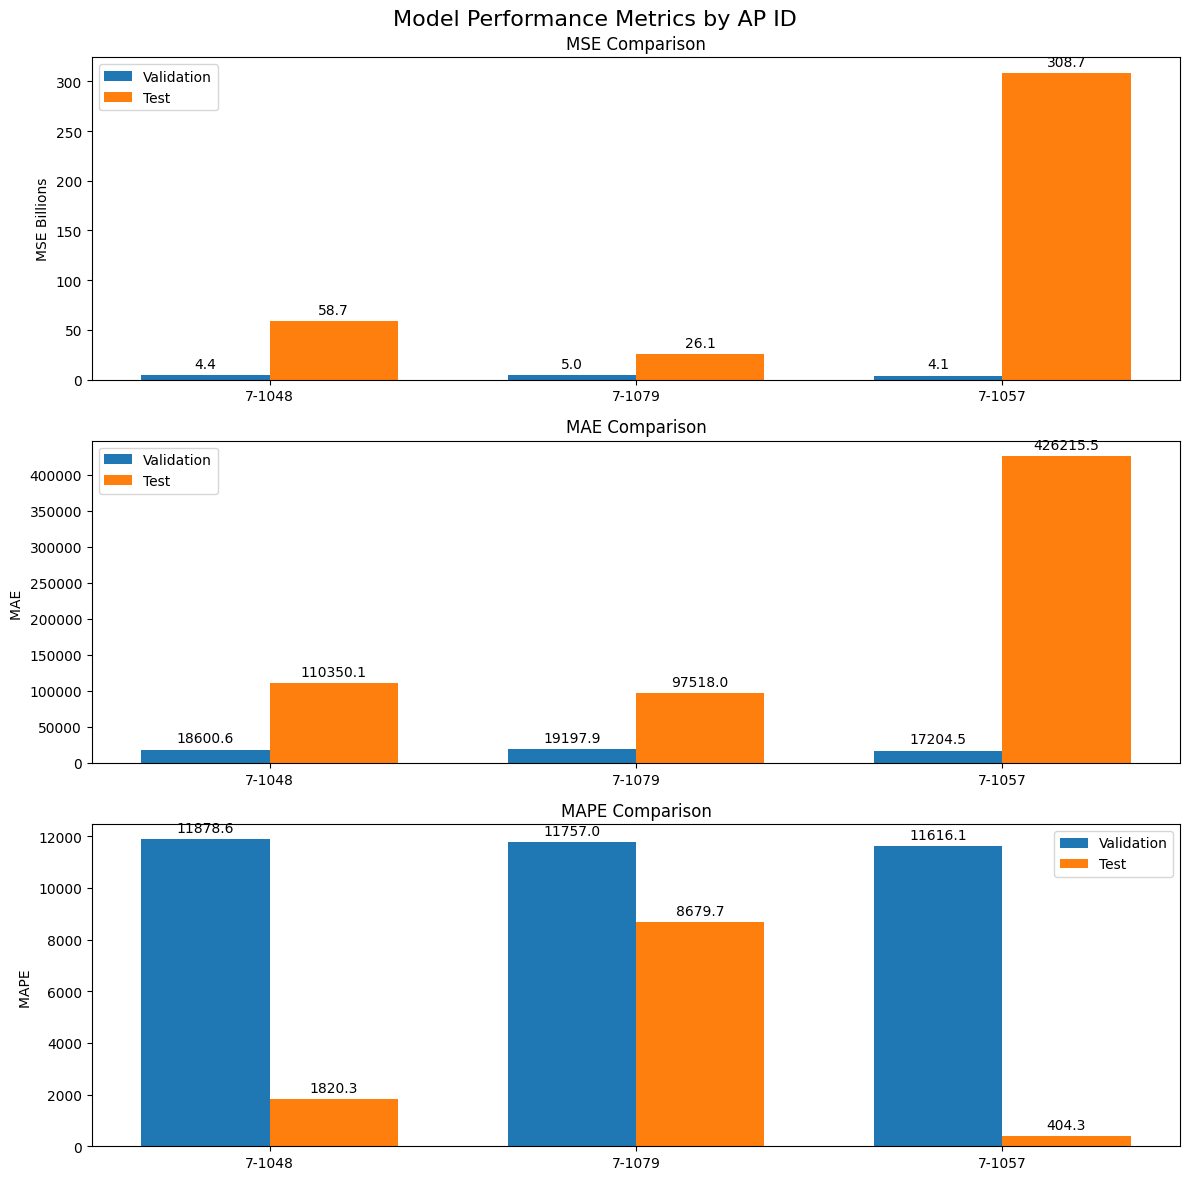

In [13]:
import matplotlib.pyplot as plt
import numpy as np

data = [
    {'AP ID': '7-1048',
     'Validation MSE': 4419854801.222224,
     'Validation MAE': 18600.596556938817,
     'Validation MAPE': 11878.55402383484,
     'Test MSE': 58749966386.37141,
     'Test MAE': 110350.07373854109,
     'Test MAPE': 1820.335364514949},
    {'AP ID': '7-1079',
     'Validation MSE': 4971951848.969152,
     'Validation MAE': 19197.917595664032,
     'Validation MAPE': 11757.01319622961,
     'Test MSE': 26075145676.34514,
     'Test MAE': 97517.99092618636,
     'Test MAPE': 8679.702914648822},
    {'AP ID': '7-1057',
     'Validation MSE': 4108761116.0634456,
     'Validation MAE': 17204.548582401872,
     'Validation MAPE': 11616.104409782974,
     'Test MSE': 308729381907.6895,
     'Test MAE': 426215.4566888236,
     'Test MAPE': 404.26856056229116}
]

# Extract AP IDs
ap_ids = [item['AP ID'] for item in data]

# Prepare metrics
metrics = ['MSE', 'MAE', 'MAPE']
n_metrics = len(metrics)
n_ap_ids = len(ap_ids)

# Create subplots
fig, axes = plt.subplots(n_metrics, 1, figsize=(12, 12))
fig.suptitle('Model Performance Metrics by AP ID', fontsize=16)

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]

    # Get validation and test values
    val_values = [item[f'Validation {metric}'] for item in data]
    test_values = [item[f'Test {metric}'] for item in data]

    # For MSE, we'll plot in millions/billions for better readability
    if metric == 'MSE':
        val_values = [v/1e9 for v in val_values]
        test_values = [v/1e9 for v in test_values]
        unit = 'Billions'
    else:
        unit = ''

    # Bar width and positions
    bar_width = 0.35
    x = np.arange(n_ap_ids)

    # Plot bars
    val_bars = ax.bar(x - bar_width/2, val_values, bar_width, label='Validation')
    test_bars = ax.bar(x + bar_width/2, test_values, bar_width, label='Test')

    # Add labels and title
    ax.set_ylabel(f'{metric} {unit}')
    ax.set_title(f'{metric} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(ap_ids)
    ax.legend()

    # Add value labels
    for bar in val_bars + test_bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Exercise 6 (EXTRA):

Reconsider your design to improve the accuracy of your model. For that, you can find a better approach to split the data (e.g., using larger observation windows) and include additional features.

<ipython-input-24-eae45b9205ae>:41: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-0.6163986 -0.6163986 -0.6163986 ... -0.6163986 -0.6163986 -0.6163986]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_scaled.loc[mask, feature_cols] = scaler.fit_transform(df.loc[mask, feature_cols])


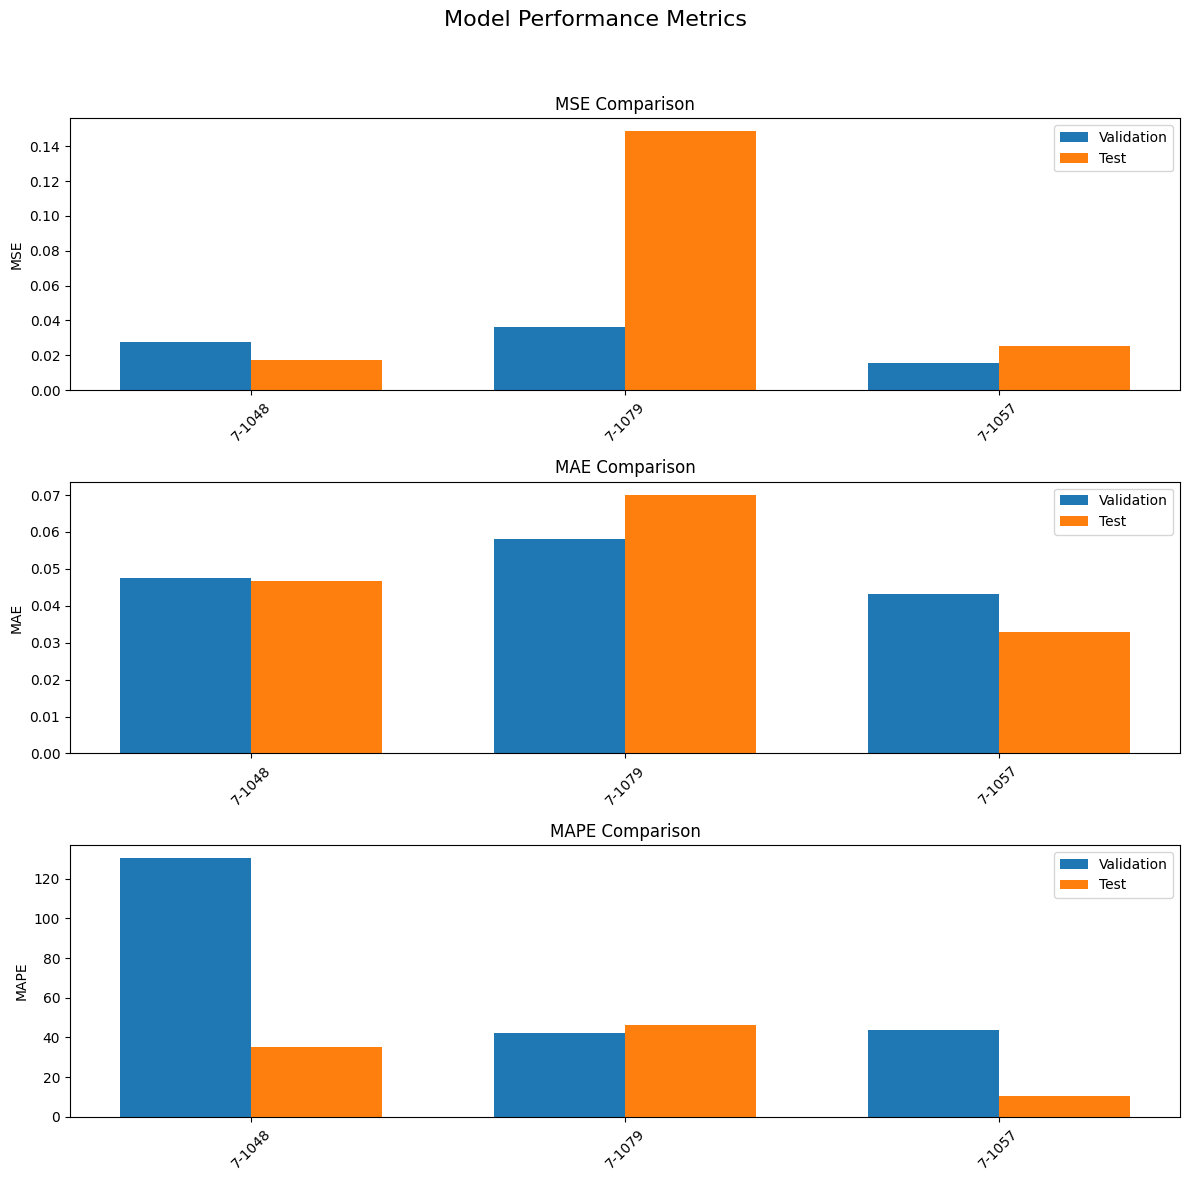

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# -------------------------------
# Load dataset
# -------------------------------

df = pd.read_pickle("datasetLab3.pkl")


# Reset index and move datetime index to a column
df = df.reset_index().rename(columns={'datetime': 'timestamp'})

# -------------------------------
# Feature Engineering
# -------------------------------

def add_time_features(df):
    df['hour'] = df['timestamp'].dt.hour
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    return df

def create_lag_features(df, lag_hours=[1, 2, 3]):
    df = df.sort_values(['AP ID', 'timestamp'])
    for lag in lag_hours:
        df[f'bytes_lag_{lag}'] = df.groupby('AP ID')['Bytes'].shift(lag)
    return df

def normalize_per_ap(df, feature_cols):
    scalers = {}
    df_scaled = df.copy()
    for ap_id in df['AP ID'].unique():
        scaler = StandardScaler()
        mask = df['AP ID'] == ap_id
        df_scaled.loc[mask, feature_cols] = scaler.fit_transform(df.loc[mask, feature_cols])
        scalers[ap_id] = scaler
    return df_scaled, scalers

def train_test_split_timewise(df, val_ratio=0.2, test_ratio=0.2):
    df = df.sort_values('timestamp')
    n = len(df)
    train_end = int(n * (1 - val_ratio - test_ratio))
    val_end = int(n * (1 - test_ratio))
    train = df.iloc[:train_end]
    val = df.iloc[train_end:val_end]
    test = df.iloc[val_end:]
    return train, val, test

def calculate_metrics(y_true, y_pred):
    epsilon = np.finfo(np.float64).eps
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), epsilon))) * 100
    return mse, mae, mape

# -------------------------------
# Model pipeline
# -------------------------------

def model_pipeline(df):
    df = add_time_features(df)
    df = create_lag_features(df)
    df = df.dropna()

    feature_cols = ['bytes_lag_1', 'bytes_lag_2', 'bytes_lag_3', 'hour_sin', 'hour_cos', 'is_weekend']

    # Normalize features per AP
    df_scaled, _ = normalize_per_ap(df, feature_cols + ['Bytes'])

    results = []

    for ap in target_aps:
        ap_df = df_scaled[df_scaled['AP ID'] == ap]
        train, val, test = train_test_split_timewise(ap_df)

        # Baseline model: predict next 'Bytes' as previous lag_1 value
        val_preds = val['bytes_lag_1']
        test_preds = test['bytes_lag_1']

        val_mse, val_mae, val_mape = calculate_metrics(val['Bytes'], val_preds)
        test_mse, test_mae, test_mape = calculate_metrics(test['Bytes'], test_preds)

        results.append({
            'AP ID': ap,
            'Validation MSE': val_mse,
            'Validation MAE': val_mae,
            'Validation MAPE': val_mape,
            'Test MSE': test_mse,
            'Test MAE': test_mae,
            'Test MAPE': test_mape
        })

    return results

# -------------------------------
# Plotting function
# -------------------------------

def plot_metrics(results, title="Model Performance Metrics"):
    ap_ids = [r['AP ID'] for r in results]
    metrics = ['MSE', 'MAE', 'MAPE']

    fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 12))
    fig.suptitle(title, fontsize=16)

    for i, metric in enumerate(metrics):
        val_vals = [r[f'Validation {metric}'] for r in results]
        test_vals = [r[f'Test {metric}'] for r in results]

        ax = axes[i]
        x = np.arange(len(ap_ids))
        bar_width = 0.35

        ax.bar(x - bar_width/2, val_vals, bar_width, label='Validation')
        ax.bar(x + bar_width/2, test_vals, bar_width, label='Test')

        ax.set_xticks(x)
        ax.set_xticklabels(ap_ids, rotation=45)
        ax.set_ylabel(metric)
        ax.set_title(f'{metric} Comparison')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# -------------------------------
# Run pipeline and plot
# -------------------------------

results = model_pipeline(df)
plot_metrics(results)
